## QM9 Dataset exploration

In [1]:
import logging
from chainer_chemistry import datasets

# show INFO level log from chainer chemistry
logging.basicConfig(level=logging.INFO)

label_names = datasets.get_qm9_label_names()
print('QM9 label_names = ', label_names)

QM9 label_names =  ['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'U0', 'U', 'H', 'G', 'Cv']


In [3]:
from chainer_chemistry.dataset.preprocessors.nfp_preprocessor import \
    NFPPreprocessor
    
preprocessor = NFPPreprocessor()
dataset, dataset_smiles = datasets.get_qm9(preprocessor, labels=None, retain_smiles=True)

c:\windows\system32\pycharm\chainer-chemistry\chainer_chemistry\dataset\parsers\csv_file_parser.py:65: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  df = pandas.DataFrame.from_csv(filepath)
100%|██████████| 133885/133885 [01:23<00:00, 1601.97it/s]
INFO:chainer_chemistry.dataset.parsers.csv_file_parser:Preprocess finished. FAIL 0, SUCCESS 133885, TOTAL 133885


In [4]:
# http://rdkit.blogspot.jp/2015/02/new-drawing-code.html
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return svg.replace('svg:','')

index=8, SMILES=C#CC
atom [6 6 6]
labels [  1.60280411e+02   8.59323025e+00   8.59321022e+00   7.15600014e-01
   2.87800007e+01  -2.60899991e-01   6.12999983e-02   3.22200000e-01
   1.77196304e+02   5.54100014e-02  -1.16609550e+02  -1.16605553e+02
  -1.16604607e+02  -1.16633774e+02   1.24820004e+01]


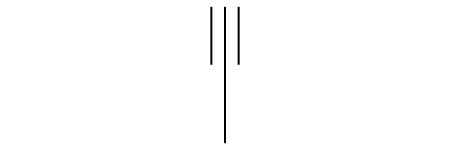

In [5]:
from ipywidgets import interact

def show_dataset(index):
    print('index={}, SMILES={}'.format(index, dataset_smiles[index]))
    atom, adj, labels = dataset[index]
    print('atom', atom)
    # print('adj', adj)
    print('labels', labels)
    mol = Chem.MolFromSmiles(dataset_smiles[index])
    return SVG(moltosvg(mol))

interact(show_dataset, index=(0, len(dataset) - 1, 1))

In [ ]:
from rdkit.Chem import Draw
index = 7381
print('drawing {}'.format(index))
mol = Chem.MolFromSmiles(train_smiles[index])
Draw.MolToFile(mol, 'mol_{}.png'.format(index), size=(600, 600))